In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
x=2*np.random.rand(100,1)
y=3+6*x+np.random.randn(100,1)

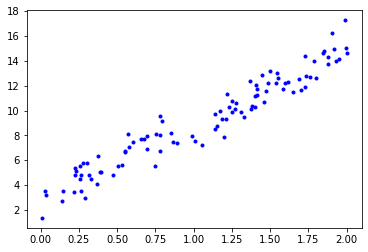

In [7]:
plt.plot(x,y,"b.")
plt.show()

In [11]:
x_b=np.c_[np.ones((100,1)),x]

In [16]:
myweights=np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
myweights

array([[2.91022891],
       [5.93822313]])

In [17]:
xdata=np.array([[0],[2]])
xnew=np.c_[np.ones((2,1)),xdata]
pred=xnew.dot(myweights)

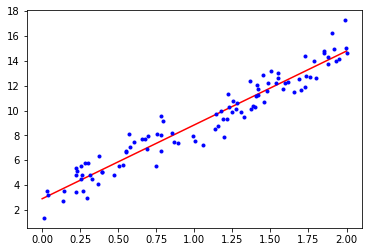

In [18]:
plt.plot(xdata, pred, 'r-')
plt.plot(x,y,'b.')

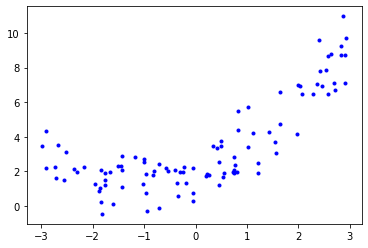

In [22]:
x=6*np.random.rand(100,1)-3
y=0.5*x**2+x+2+np.random.randn(100,1)
plt.plot(x,y,'b.')
plt.show()

In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

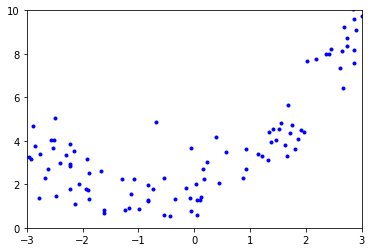

In [24]:
x=6*np.random.rand(100,1)-3
y=0.5*x**2+x+2+np.random.randn(100,1)
plt.plot(x,y,'b.')
plt.axis([-3,3,0,10])
plt.show()

In [25]:
poly_features=PolynomialFeatures(degree=2, include_bias=False)
x_poly=poly_features.fit_transform(x)

In [26]:
lin_reg=LinearRegression()
lin_reg.fit(x_poly, y)

LinearRegression()

In [28]:
lin_reg.intercept_
lin_reg.coef_

array([[0.91035224, 0.56285678]])

In [29]:
xnew=np.linspace(-3,3,100).reshape(100,1)
xnewPoly=poly_features.transform(xnew)
ypredict=lin_reg.predict(xnewPoly)

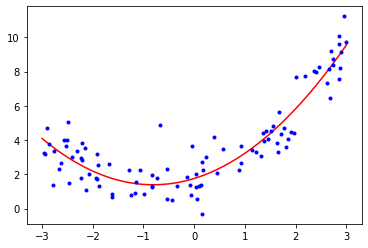

In [30]:
plt.plot(xnew, ypredict, 'r-')
plt.plot(x,y,'b.')
plt.show()

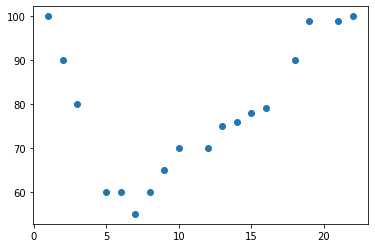

In [31]:
import matplotlib.pyplot as plt

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

plt.scatter(x, y)
plt.show()

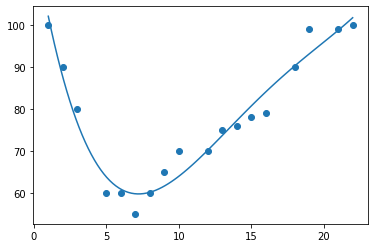

In [34]:
import numpy
import matplotlib.pyplot as plt

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

mymodel = numpy.poly1d(numpy.polyfit(x, y, 4))

myline = numpy.linspace(1, 22, 100)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()

In [35]:
t1 =  np.array([
                    [ 1,    1000],
                    [ 5,   10000],
                    [10,  100000],
               ])
t2 =  np.array([
                    [  2,    100],
                    [ 15,  20000],
                    [100, 300000],
               ])

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
mms=MinMaxScaler()

In [38]:
mms.fit(t1)

MinMaxScaler()

In [40]:
res=mms.transform(t1)

In [41]:
mms.inverse_transform(res)

array([[1.e+00, 1.e+03],
       [5.e+00, 1.e+04],
       [1.e+01, 1.e+05]])

In [42]:
from keras.models import Model
from keras.layers import Input, Dense, LSTM
import numpy as np

x=np.array([[[1.],[2.],[3.],[4.],[5.]]])
y=np.array([[6.]])

xInput=Input(batch_shape=(None, 5, 1))
xLstm=LSTM(3)(xInput)
xOutput=Dense(1)(xLstm)

model=Model(xInput, xOutput)
model.compile(loss='mean_squared_error', optimizer='adam')

print(model.summary())

model.fit(x,y,epochs=50, batch_size=1, verbose=0)
model.predict(x, batch_size=1)

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 5, 1)]            0         
_________________________________________________________________
lstm (LSTM)                  (None, 3)                 60        
_________________________________________________________________
dense (Dense)                (None, 1)                 4         
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________
None


array([[-0.10768857]], dtype=float32)

In [43]:
from keras.models import Model
from keras.layers import Input, Dense, LSTM, TimeDistributed
import numpy as np


x = np.array([[[1.], [2.], [3.], [4.], [5.]]])
y = np.array([[[2.], [3.], [4.], [5.], [6.]]])
xInput = Input(batch_shape=(None, 5, 1))
xLstm = LSTM(3, return_sequences=True)(xInput)
xOutput = TimeDistributed(Dense(1))(xLstm)
model = Model(xInput, xOutput)
model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary)

<bound method Model.summary of <tensorflow.python.keras.engine.functional.Functional object at 0x00000230F1215C48>>
